## Importing Basic Libraries

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

In [84]:
df=pd.read_csv("desktop/py_files/data/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [85]:
df.shape

(2938, 22)

In [86]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [87]:
df.Country.value_counts()

Portugal                            16
Maldives                            16
Brunei Darussalam                   16
Democratic Republic of the Congo    16
Yemen                               16
                                    ..
Marshall Islands                     1
Dominica                             1
Palau                                1
Saint Kitts and Nevis                1
Nauru                                1
Name: Country, Length: 193, dtype: int64

In [88]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Cleaning the Data

In [89]:
df.isnull().sum() #checking null values in our dataset

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#### Adjusting NAN values

#### Alcohol

In [90]:
df.Alcohol.isnull().sum()

194

In [91]:
df.Alcohol.value_counts() 

0.01     288
0.03      15
0.04      13
0.09      12
0.02      12
        ... 
8.98       1
5.86       1
9.03       1
6.87       1
13.28      1
Name: Alcohol, Length: 1076, dtype: int64

In [92]:
#from the above data, we can conclude most countries have an alcohol consumption around 0.01
#so we will fill the nan columns with 0.01

In [93]:
df.Alcohol.fillna(0.01,inplace=True)

In [94]:
df.Alcohol.isnull().sum()#in the alcohol column we have removed the nan values

0

#### Hepatitis-B

In [95]:
df["Hepatitis B"].value_counts()

99.0    240
98.0    210
96.0    167
97.0    155
95.0    149
       ... 
19.0      1
23.0      1
11.0      1
1.0       1
12.0      1
Name: Hepatitis B, Length: 87, dtype: int64

In [96]:
df["Hepatitis B"].fillna(99.0,inplace=True)

#### Population

In [97]:
a=df.Population.mean()

In [98]:
df["Population"].fillna(a,inplace=True)

#### GDP

In [99]:
b=df.GDP.median()

In [100]:
df.GDP.fillna(b,inplace=True)

#### Remaining Columns

In [101]:
df.dropna(inplace=True)
#dropping the remaining na values

In [102]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [103]:
df.head(1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1


### Visualizations

<AxesSubplot:>

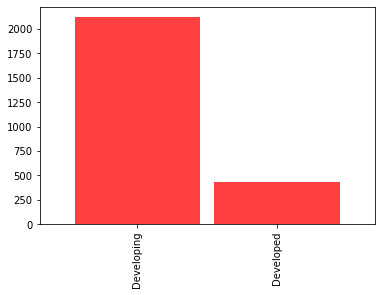

In [104]:
# Developing vs Developed counts
#plt.subplots(figsize=(12,6))
df['Status'].value_counts().plot.bar(width=0.9,color="red",alpha=0.75)

In [112]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

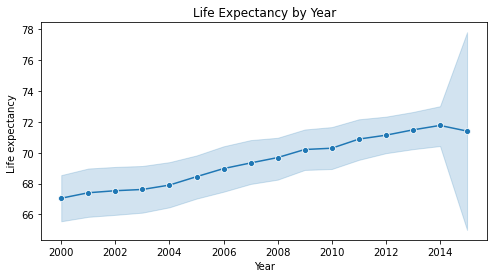

In [119]:
#year vs Life Expectancy
plt.subplots(figsize=(8,4))
sns.lineplot("Year","Life expectancy ",data=df,marker="o")
plt.title('Life Expectancy by Year')
plt.show()


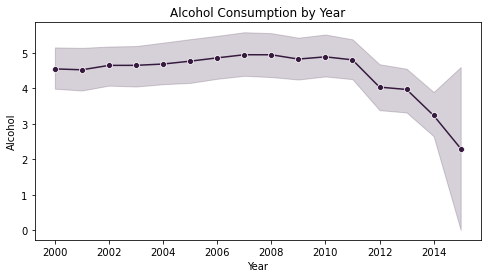

In [133]:
# year vs alcohol_consumption
plt.subplots(figsize=(8,4))
sns.set_palette("rocket")
sns.lineplot("Year","Alcohol",data=df,marker="o")
plt.title('Alcohol Consumption by Year')
plt.show()

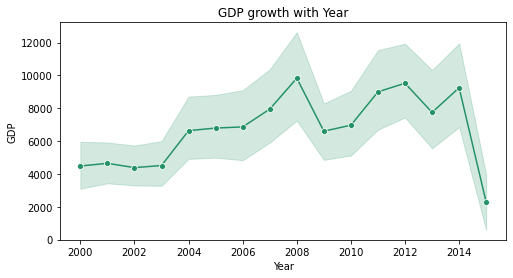

In [139]:
# year vs GDP_growth
plt.subplots(figsize=(8,4))
sns.set_palette("summer")
sns.lineplot("Year","GDP",data=df,marker="o")
plt.title('GDP growth with Year')
plt.show()

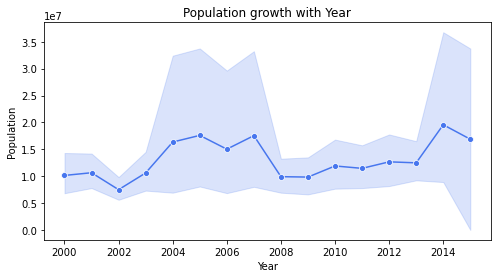

In [143]:
# year vs population_growth
plt.subplots(figsize=(8,4))
sns.set_palette("turbo")
sns.lineplot("Year","Population",data=df,marker="o")
plt.title('Population growth with Year')
plt.show()

### Model Building

#### Label encoding

In [146]:
#country
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.Country.drop_duplicates())
df.Country=le.transform(df.Country)

In [147]:
#status
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.Status.drop_duplicates())
df.Status=le.transform(df.Status)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2556 non-null   int32  
 1   Year                             2556 non-null   int64  
 2   Status                           2556 non-null   int32  
 3   Life expectancy                  2556 non-null   float64
 4   Adult Mortality                  2556 non-null   float64
 5   infant deaths                    2556 non-null   int64  
 6   Alcohol                          2556 non-null   float64
 7   percentage expenditure           2556 non-null   float64
 8   Hepatitis B                      2556 non-null   float64
 9   Measles                          2556 non-null   int64  
 10   BMI                             2556 non-null   float64
 11  under-five deaths                2556 non-null   int64  
 12  Polio               

In [156]:
#dividing our data
y=df["Life expectancy "]
x=df.drop("Life expectancy ",axis=1)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [159]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [160]:
reg.score(X_train,y_train)

0.8377116187324025

In [161]:
#our_model_score

In [165]:

#applying ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ls=Ridge()
params={"alpha":[0.001,0.002,1,10,20,20,40,50,100]}
lreg=GridSearchCV(ls,params,cv=3)
lreg.fit(X_train,y_train)

y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)

print(lreg.score(X_test,y_test))

0.8270413865338041


c:\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.83007e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.55739e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7904e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.83046e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
c:\python\python38\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.5578e-18): result may not be accurate.
  return linalg.solve(A, Xy, s

In [ ]:
#playing with grid_search_cv params
print("Best model score:",lreg.best_score_)
print("Best value of alpha:",lreg.best_params_)